## Project 2 - Programming for Data Analysis

### Course: HDip in Computing in Data Analytics
### Module: Programming for Data Analysis
### Student: Sarah Hastings
### Student Number: G00235562
***

### Project Outline - An analysis of paleo-present climate data

• Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

• Examine Irish context:
o Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)

• Fuse and analyse data from various data sources and format fused data set as a pandas 
dataframe and export to csv and json formats

• For all of the above variables, analyse the data, the trends and the relationships between 
them (temporal leads/lags/frequency analysis).

• Predict global temperature anomaly over next few decades (synthesise data) and compare to 
published climate models if atmospheric CO2 trends continue

• Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice coverage)

### Paleoclimatology
Paleoclimatology is the scientific study of previous climates, during Earth's different geologic ages, predating the invention of meteorological instruments, when no direct measurement data were available. This study allows us to try to identify the causes of climate change and trends in the past to better understand our present and future climate.


![image](./data/thumbnail_big.jpg)

Paleoclimatology data are derived from natural sources such as tree rings, cave deposits, ice cores, fire history, coral growth bands, pollen, stalagmites, and ocean and lake sediments. These proxy climate data extend the weather and climate information archive by hundreds to millions of years. This is the world's largest archive of paleoclimatology data, with contributions from the international scientific community. The data include geophysical or biological measurement time series and some reconstructed climate variables such as temperature and precipitation.
    
The time span "800,000 years to present" refers to a geological and climatological timeframe. In this context, it likely pertains to the study of paleoclimate data, which involves analyzing climate conditions, atmospheric composition, and other environmental factors over an extended period.

When researchers refer to "800,000 years to present," they are typically looking at various proxies and records, such as ice cores, sediment layers, tree rings, and other indicators, to reconstruct and understand Earth's climate history. This extensive time frame allows scientists to investigate long-term climate trends, natural variations, and the impact of different factors on the Earth's climate system.

In the context of the previous question regarding the analysis of CO2 versus temperature anomaly over this period, it suggests a comprehensive study of the interplay between greenhouse gas concentrations and temperature variations throughout a significant portion of Earth's history.

Scientists can also drill into ice sheets and extract ice cores to analyze deposits trapped within the ice, such as pollen and gas. This allows them to better understand atmospheric and climatic conditions that existed when particular layers of the sheet formed. All of this proxy data is synthesized to develop an understanding of Earth’s climate over different geologic periods.

The field of paleoclimatology has taught scientists that the climate of Earth is in a perpetual state of change. Research has revealed that there have been several ice ages as well as several periods of global warming in Earth's history. Additionally, scientists have determined that there can be both short- and long-term trends in climate. For instance, while climate change can occur—and often has occurred—over an extended amount of time, paleoclimatologists have also recorded shorter warming periods during an ice age. Scientists have become aware that Earth is very dynamic and that past events might help us better understand the past and prepare for future climate changes.

Paleoclimatology has also helped scientists study and understand how other environmental factors, such as continental drift, solar energy, greenhouses gases in the atmosphere, and the variation in Earth’s orbit have all affected the climate of Earth over time. The science of paleoclimatology is vital to our understanding of climate on Earth. As scientists become increasingly aware of how climates have been influenced in the past, they can develop models that help predict how increased carbon dioxide levels and other changes might impact the climate of Earth in the future.

The science of paleoclimatology is important for past, contemporary, and future issues. Understanding past climate helps us to explain how current ecosystems came to be. For example, climate typically controls what types of vegetation grow in a particular area. Furthermore, paleoclimatology provides data that we can use to model and predict both current and future climate change scenarios. Computer models can be used to study the potential effect of increased atmospheric carbon dioxide on climate.

With a system as complex as Earth's climate, it is a daunting task for scientists to be able to make projections about future climate changes and how it may affect the distribution of plants and animals. However, paleoclimate data are used as a foundation for climate scientists by providing crucial information such as rates of past climate change and how vegetation and animal populations responded to the change. Computer models can be used predict different future climate patterns, and paleoclimate data provides a useful framework from which to base these models. For more information about climate proxies and climate change, see the collections of web-based materials below

Based on air bubbles trapped in mile-thick ice cores and other paleoclimate evidence, we know that during the ice age cycles of the past million years or so, atmospheric carbon dioxide never exceeded 300 ppm. Before the Industrial Revolution started in the mid-1700s, atmospheric carbon dioxide was 280 ppm or less.

### Importing libraries

In [1]:
# Import pandas to allow for data analysis, manipulation, work with dataframes
import pandas as pd
# Use Pyplot, part of the Matplotlib library to visualize diagrams/use for visual data/plots etc 
import matplotlib.pyplot as plt
# Import numpy to work with numerical data, arrays
import numpy as np
# Importing seaborn gives a variety of visualization patterns in addition to matplotlib
import seaborn as sns
# Import for operating system related tasks
import os
# Useful for plotting visual relationships between data 
from pandas.plotting import andrews_curves
# Split the dataset into train and test models
from sklearn.model_selection import train_test_split
# Training model
from sklearn.preprocessing import StandardScaler
# Classification and Logistic regression
from sklearn.linear_model import LogisticRegression
# View accuracy/predictability
from sklearn.metrics import accuracy_score,confusion_matrix

### 1. Analyse CO2 vs Temperature Anomaly from 800kyrs – present

what doing, what aim 
trends, patterns, correlations, etc on erths response to changing co2 

 how changes in atmospheric carbon dioxide levels correspond to variations in temperature anomalies. This relationship is crucial in understanding the impact of greenhouse gas emissions on the Earth's climate
 
 Positive Relationship: An increase in CO2 levels is often associated with a positive temperature anomaly, indicating a warming trend. This aligns with the concept of the greenhouse effect, where higher concentrations of greenhouse gases trap more heat in the atmosphere.

Negative Relationship: While the overall trend is positive, variations may exist due to other factors influencing climate, such as natural climate variability, solar radiation, or volcanic activity.

 exploration of the correlation between atmospheric CO2 levels and variations in temperature anomalies over time, providing insights into the impact of human-induced greenhouse gas emissions on global climate pattern
 
 
deuterium used as temp - compared co2 methane other greenhouse gases etc - see changes over time and effects on climate change and correlations between them

mauan loa - recording co2 levels, longest record of measurements - track ch4 also

targets set to keep temp lower than 1.5/2



For a period of at least 800,000 years, CO2 concentrations ranged from 180 to 300 parts per million, according to a high-resolution ice-core record from Antarctica. Since the start of the Industrial Age, however, human-caused greenhouse-gas emissions have steadily raised CO2 concentrations

Scientists have been drilling ice sheets and analyzing the ice cores since the 1950s, particularly in Antarctica and Greenland.  Areas with accumulating snow turn to ice with air bubbles that preserve samples of the atmosphere from world atmospheres of the past.  Scientists are able to analyze the cores to learn about past changes in the concentration of atmospheric gases and the glacial-interglacial cycles for the past million years.

Allows understanding of historic data and trends

Changes in past atmospheric carbon dioxide concentrations can be determined by measuring the composition of air trapped in ice cores from Antarctic

parts per million by volume (p.p.m.v.)

The EDC3 chronology for the EPICA Dome C ice core


### Lüthi, D et al. (2008) - High-resolution carbon dioxide concentration record 650,000–800,000 years before present

In 2008, Dieter Lüthi and other scientists pubished a paper that extended the ice core record of atmospheric CO2 concentrations from 650,000 years before present to 800,000 years before present. The research is based on ice core data extracted from Antarctica, specifically from the EPICA Dome C ice core, analyzing the lowest 200 metres of the ice core drilled at EPICA Dome C in Antarctica. Ice cores act as natural archives, preserving information about past atmospheric conditions. In this study, the researchers focused on measuring and analyzing CO2 concentrations in air bubbles trapped within the ice layers. By examining these samples with high precision, scientists were able to reconstruct the long-term history of CO2 levels, providing insights into natural climate variability over an extended geological timescale.

The findings of the study contribute valuable information to our understanding of past climate dynamics, helping scientists comprehend the natural variations in greenhouse gas concentrations and their relationship to climate change. Such records are crucial for assessing the impact of human activities on the current rise in atmospheric CO2 and its implications for future climate scenarios.

Scientists found that atmospheric concentrations correlated strongly with Antarctic temperature throughout the eight glacial cycles in the 800,000 year ice core record.  They report a reading of 172 parts per million (ppm) CO2 as the lowest CO2 concentration ever recorded in an ice core--about 10 ppm lower than the previous lowest reading.

Composite CO2 record (0-800 kyr BP)	
0-22 kyr BP:	Dome C (Monnin et al. 2001) measured at University of Bern
22-393 kyr BP:	Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble
393-416 kyr BP:	Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble
416-664 kyr BP:	Dome C (Siegenthaler et al. 2005)  measured at University of Bern
664-800 kyr BP:	Dome C (Luethi et al. (sub)) measured at University of Bern

EDC3_gas_a (yr)    0
CO2 (ppmv)         0
dtype: int64
       EDC3_gas_a (yr)   CO2 (ppmv)
count      1096.000000  1096.000000
mean     390905.979015   230.835675
std      262092.947239    27.573616
min         137.000000   171.600000
25%      137133.500000   207.500000
50%      423206.500000   231.450000
75%      627408.000000   251.525000
max      798512.000000   298.600000


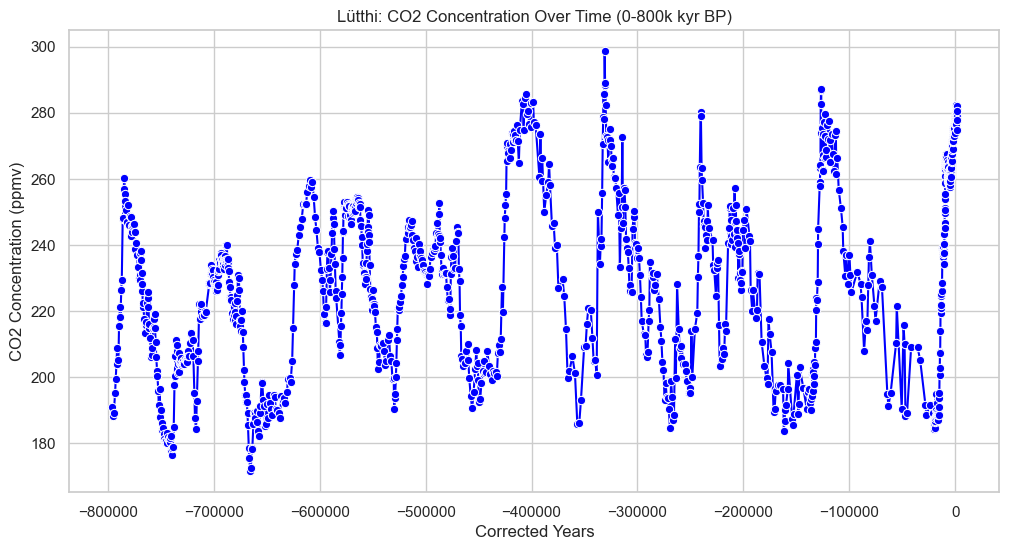

In [14]:
# Luthi Composite CO2 Data
# Specify the path to your Excel file
file_path = './data/41586_2008_BFnature06949_MOESM31_ESM.xls'

# Read the specified sheet into a Pandas DataFrame
luthi = pd.read_excel(file_path, sheet_name='3.  Composite CO2', skiprows=6, index_col=None)
print(luthi.isnull().sum())
print(luthi.describe())

# Filter for necessary columns, correct icecore year
luthi['Corrected Years'] = 1950 - (luthi['EDC3_gas_a (yr)'].astype(int))
luthi.head()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Corrected Years', y='CO2 (ppmv)', data=luthi, marker='o', color='blue', ci=None)

# Reverse the x-axis
#plt.gca().invert_xaxis()

# Adding labels and title
plt.xlabel('Corrected Years')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('Lütthi: CO2 Concentration Over Time (0-800k kyr BP)')
plt.show()

### IPCC Data - C02 Composite Antartic Ice Core
Composite CO2 record (0-800 kyr BP)
Composite of atmospheric CO2 records from Antarctic ice cores
EPICA Dome C CO2 record from 800 to 600 kyr before present
This new version of CO2 composite replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.
For details about the improvements relative to the previous version see supplementary information of the main article.
For detailed references of all records collected in this file also refer to the supplemetary information of the main article.
For latest anthropogenic data refer to NOAA/Mauna Loa record.
Age unit is in years before present (yr BP) whereas present refers to 1950.

Year                     0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64
                Year   CO2 (ppmv)  sigma mean CO2 (ppmv)
count    1901.000000  1901.000000            1901.000000
mean   242810.270113   235.566624               1.340519
std    274261.195468    35.902698               0.924188
min       -51.030000   173.713620               0.010000
25%     14606.209000   204.826743               0.639335
50%     74525.645000   232.456008               1.073871
75%    504177.187879   257.930000               1.800000
max    805668.868405   368.022488               9.960000


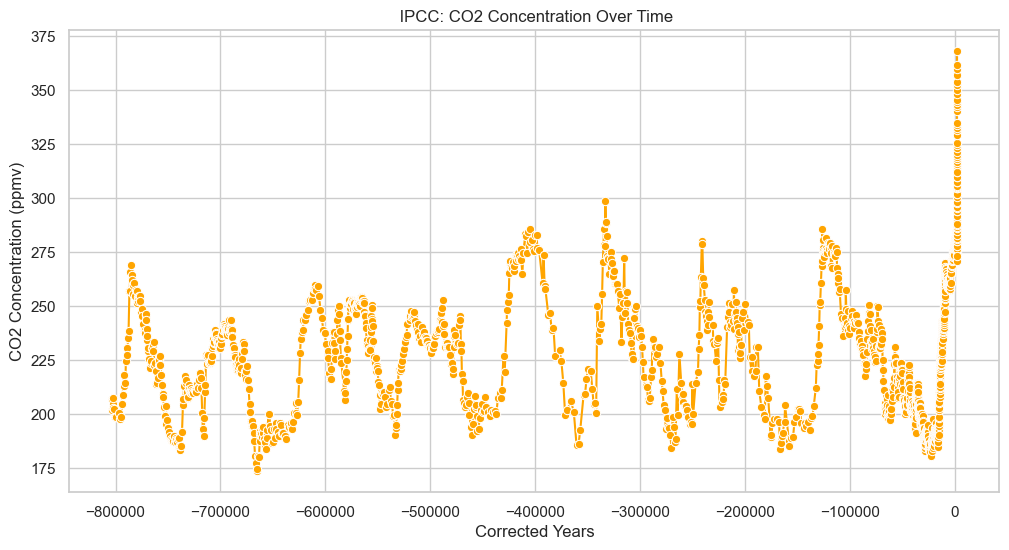

In [13]:
# Specify the path to your Excel file
file_path = './data/grl52461-sup-0003-supplementary.xls'

# Read the specified sheet into a Pandas DataFrame
ipcc = pd.read_excel(file_path, sheet_name='CO2 Composite', skiprows=14, index_col=None)

# Rename the first column from 'abc' to 'Year'
ipcc = ipcc.rename(columns={'Gasage (yr BP) ': 'Year'})
print(ipcc.isnull().sum())
print(ipcc.describe())
ipcc.head()

ipcc['Corrected Years'] = 1950 - (ipcc['Year'].astype(int))
ipcc.head()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Corrected Years', y='CO2 (ppmv)', data=ipcc, marker='o', color='orange', ci=None)

# Reverse the x-axis
#plt.gca().invert_xaxis()

# Adding labels and title
plt.xlabel('Corrected Years')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title(' IPCC: CO2 Concentration Over Time')

plt.show()

### Compare Luthi & IPCC

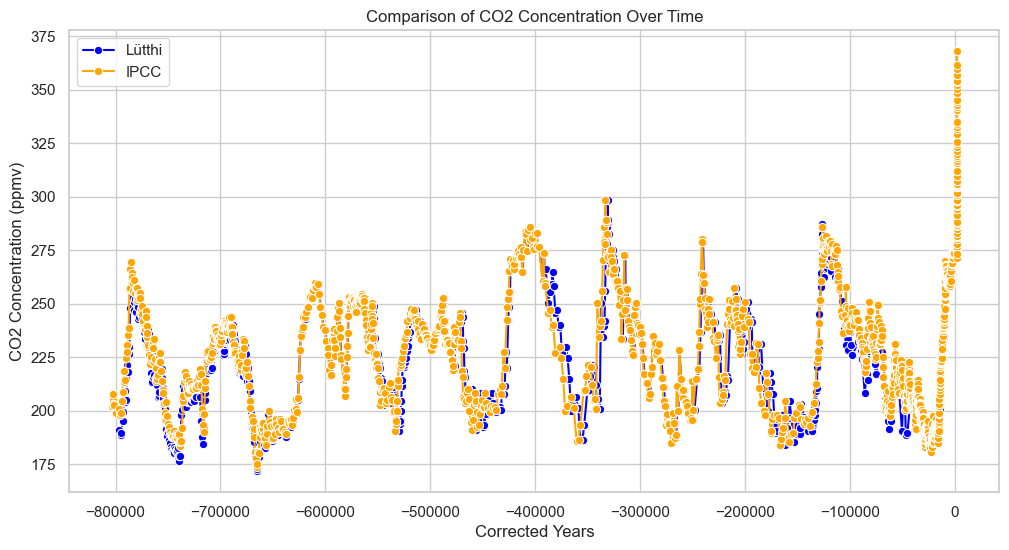

In [15]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data from the first DataFrame (luthi)
sns.lineplot(x='Corrected Years', y='CO2 (ppmv)', data=luthi, marker='o', color='blue', ci=None, label='Lütthi', ax=ax)

# Plot data from the second DataFrame (ipcc)
sns.lineplot(x='Corrected Years', y='CO2 (ppmv)', data=ipcc, marker='o', color='orange', ci=None, label='IPCC', ax=ax)

# Reverse the x-axis if needed
#plt.gca().invert_xaxis()

# Adding labels and title
plt.xlabel('Corrected Years')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('Comparison of CO2 Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Bring up further up to date
CO2 expressed as a mole fraction in dry air  abbreviated as ppm


Year          0
CO2 (ppmv)    0
unc           0
dtype: int64
             Year  CO2 (ppmv)           unc
count    65.00000   65.000000  6.500000e+01
mean   1991.00000  359.259385  1.200000e-01
std      18.90767   31.324085  9.790051e-17
min    1959.00000  315.980000  1.200000e-01
25%    1975.00000  331.130000  1.200000e-01
50%    1991.00000  355.700000  1.200000e-01
75%    2007.00000  384.020000  1.200000e-01
max    2023.00000  421.080000  1.200000e-01


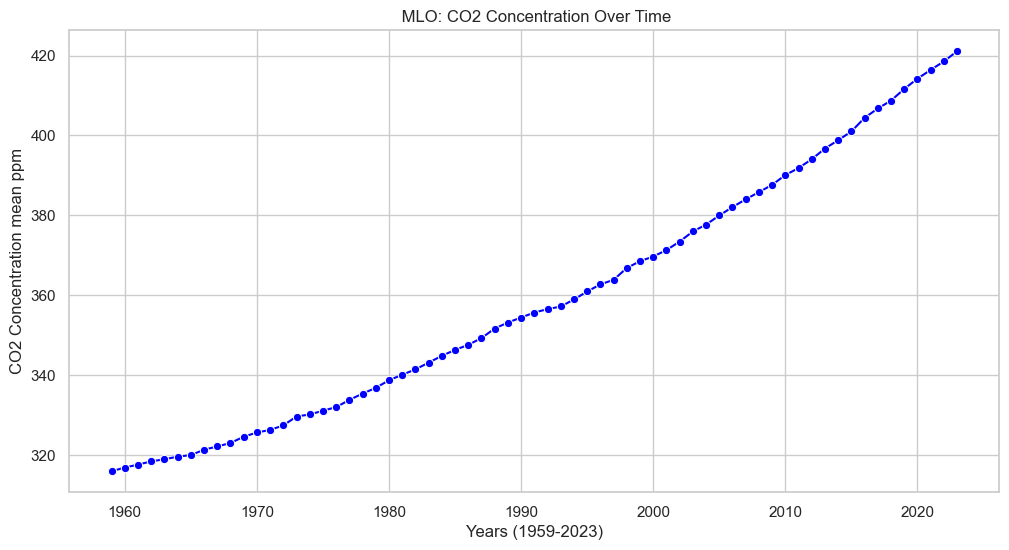

In [5]:
# Specify the path to your Excel file
file_path = './data/co2_annmean_mlo.csv'

# Read the specified sheet into a Pandas DataFrame
co2mlo = pd.read_csv(file_path, skiprows=43, index_col=None)
# Rename columns
co2mlo = co2mlo.rename(columns={'year': 'Year', 'mean': 'CO2 (ppmv)'})

print(co2mlo.isnull().sum())
print(co2mlo.describe())
co2mlo.head()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='CO2 (ppmv)', data=co2mlo, marker='o', color='blue', ci=None)

# Adding labels and title
plt.xlabel('Years (1959-2023)')
plt.ylabel('CO2 Concentration mean ppm')
plt.title(' MLO: CO2 Concentration Over Time')
plt.show()

TRY AND ADD / CONCAT LUTHI WITH MLO - 1959 ONWARDS

In [6]:
# Select columns from ipcc and filter rows up to and including 1958
ipcc_selected = ipcc.loc[ipcc['Corrected Years'] <= 1958, ['Corrected Years', 'CO2 (ppmv)']]

# Select columns from co2mlo and filter rows from 1959 onwards
co2mlo_selected = co2mlo.loc[co2mlo['Year'] >= 1959, ['Year', 'CO2 (ppmv)']]

# Rename columns to have consistent names
ipcc_selected.columns = ['Year', 'CO2 (ppmv)']
co2mlo_selected.columns = ['Year', 'CO2 (ppmv)']

# Concatenate the two DataFrames
combined_data = pd.concat([ipcc_selected, co2mlo_selected], ignore_index=True)

combined_data_sorted = combined_data.sort_values(by='Year')

# Print the sorted DataFrame
print(combined_data_sorted)

# Print the combined DataFrame
#print(combined_data.head())
print(combined_data.describe())

        Year  CO2 (ppmv)
1852 -803718  207.285440
1851 -803182  202.226839
1850 -802572  204.861938
1849 -802059  207.498645
1848 -801975  202.921723
...      ...         ...
1913    2019  411.650000
1914    2020  414.210000
1915    2021  416.410000
1916    2022  418.530000
1917    2023  421.080000

[1918 rows x 2 columns]
                Year   CO2 (ppmv)
count    1918.000000  1918.000000
mean  -238706.933264   237.311866
std    273990.311708    39.765915
min   -803718.000000   173.713620
25%   -498938.250000   205.025598
50%    -69153.500000   232.890003
75%    -12463.000000   259.280949
max      2023.000000   421.080000


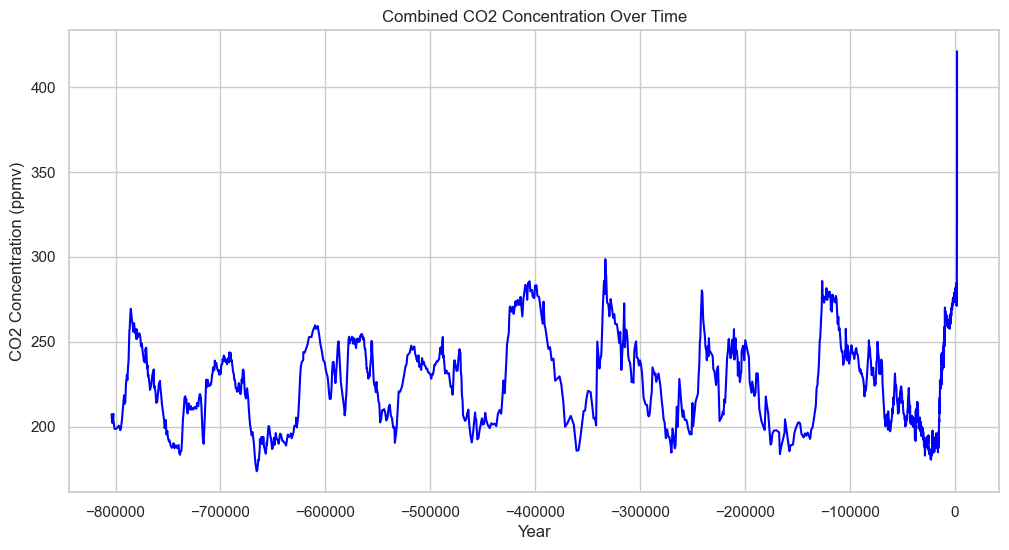

In [7]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the combined data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='CO2 (ppmv)', data=combined_data, linestyle='-', color='blue', ci=None)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('Combined CO2 Concentration Over Time')
plt.show()

https://www.e-education.psu.edu/meteo469/node/134
    
    
    Methane, temperature (from hydrogen isotope rations ("δD"), and carbon dioxide from the Dome C ice core. (EPICA Project members, 2006)
Figure 3.35: Methane, temperature (from hydrogen isotope ratios ("δD"), and carbon dioxide from the Dome C ice core.
Credit: EPICA

### Temperature

### EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA

Temperature was estimated after correction for sea-water isotopic composition (Bintanja et al, 2005) and for ice sheet elevation (Parrenin et al, 2007) on EDC3 age scale (Parrenin et al, 2007).

In [8]:
# Specify the path to your Excel file
file_path = './data/epicaDC.deuttemp.EDC3-AICC.xlsx'

# Read the specified sheet into a Pandas DataFrame
jouzel_temp = pd.read_excel(file_path)
print(jouzel_temp.isnull().sum())
print(jouzel_temp.describe())
jouzel_temp.head()

bag              0
ztop             0
EDC3béta         0
AICC2012         0
deutfinal       15
temp             0
acc-EDC3beta     0
dtype: int64
              bag         ztop       EDC3béta       AICC2012    deutfinal  \
count  5819.00000  5819.000000    5819.000000    5819.000000  5804.000000   
mean   2910.00000  1599.950000  191800.948469  192715.210134  -417.742884   
std    1679.94494   923.969717  193448.729761  195698.666350    17.949569   
min       1.00000     0.000000     -50.000000     -55.000000  -450.100000   
25%    1455.50000   799.975000   47540.535000   46505.000000  -432.300000   
50%    2910.00000  1599.950000  123446.200000  121574.666700  -421.300000   
75%    4364.50000  2399.925000  276835.550000  277050.500000  -403.200000   
max    5819.00000  3199.900000  820093.900000  821838.000000  -361.200000   

              temp  acc-EDC3beta  
count  5819.000000   5819.000000  
mean    213.474721      2.044824  
std       3.130075      0.678126  
min     207.900000  

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


In [16]:
# Filter for necessary columns, correct icecore year & convert kelvin to celsius temp
#jouzel_temp = jouzel_temp.iloc[:, [3,5]]
jouzel_temp['Corrected Years'] = 1950 - (jouzel_temp['EDC3béta'].astype(int))
jouzel_temp['Celsius temp'] = jouzel_temp['temp'] - 273.15
#temp.head()
#print(jouzel_temp.describe())

              bag         ztop       EDC3béta       AICC2012    deutfinal  \
count  5819.00000  5819.000000    5819.000000    5819.000000  5804.000000   
mean   2910.00000  1599.950000  191800.948469  192715.210134  -417.742884   
std    1679.94494   923.969717  193448.729761  195698.666350    17.949569   
min       1.00000     0.000000     -50.000000     -55.000000  -450.100000   
25%    1455.50000   799.975000   47540.535000   46505.000000  -432.300000   
50%    2910.00000  1599.950000  123446.200000  121574.666700  -421.300000   
75%    4364.50000  2399.925000  276835.550000  277050.500000  -403.200000   
max    5819.00000  3199.900000  820093.900000  821838.000000  -361.200000   

              temp  acc-EDC3beta  Corrected Years  Celsius temp  
count  5819.000000   5819.000000      5819.000000   5819.000000  
mean    213.474721      2.044824   -189850.485479    -59.675279  
std       3.130075      0.678126    193448.751428      3.130075  
min     207.900000      1.096556   -818143

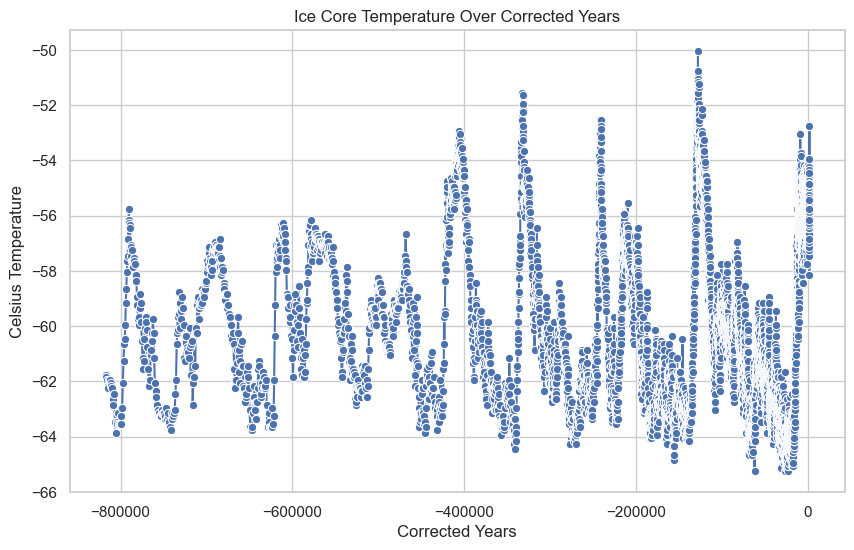

In [10]:
# Plot 'Corrected Years' and 'Celsius temp' 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Corrected Years', y='Celsius temp', data=jouzel_temp, marker='o')

# Adding labels and title
plt.xlabel('Corrected Years')
plt.ylabel('Celsius Temperature')
plt.title('Ice Core Temperature Over Corrected Years')
plt.grid(True)
plt.show()

In [12]:
# bring temp up to date ? above only to 2000

# Specify the path to your Excel file
file_path = './data/epicaDC.deuttemp.EDC3-AICC.xlsx'

# Read the specified sheet into a Pandas DataFrame
jouzel_temp = pd.read_excel(file_path)
print(jouzel_temp.isnull().sum())
print(jouzel_temp.describe())
jouzel_temp.head()

bag              0
ztop             0
EDC3béta         0
AICC2012         0
deutfinal       15
temp             0
acc-EDC3beta     0
dtype: int64
              bag         ztop       EDC3béta       AICC2012    deutfinal  \
count  5819.00000  5819.000000    5819.000000    5819.000000  5804.000000   
mean   2910.00000  1599.950000  191800.948469  192715.210134  -417.742884   
std    1679.94494   923.969717  193448.729761  195698.666350    17.949569   
min       1.00000     0.000000     -50.000000     -55.000000  -450.100000   
25%    1455.50000   799.975000   47540.535000   46505.000000  -432.300000   
50%    2910.00000  1599.950000  123446.200000  121574.666700  -421.300000   
75%    4364.50000  2399.925000  276835.550000  277050.500000  -403.200000   
max    5819.00000  3199.900000  820093.900000  821838.000000  -361.200000   

              temp  acc-EDC3beta  
count  5819.000000   5819.000000  
mean    213.474721      2.044824  
std       3.130075      0.678126  
min     207.900000  

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


In [ ]:
plot temp over c02

amend methane file

### Temporature Anomoly

Year       0
Anomaly    0
dtype: int64
              Year     Anomaly
count   174.000000  174.000000
mean   1936.500000    0.054023
std      50.373604    0.370315
min    1850.000000   -0.540000
25%    1893.250000   -0.210000
50%    1936.500000   -0.050000
75%    1979.750000    0.185000
max    2023.000000    1.440000


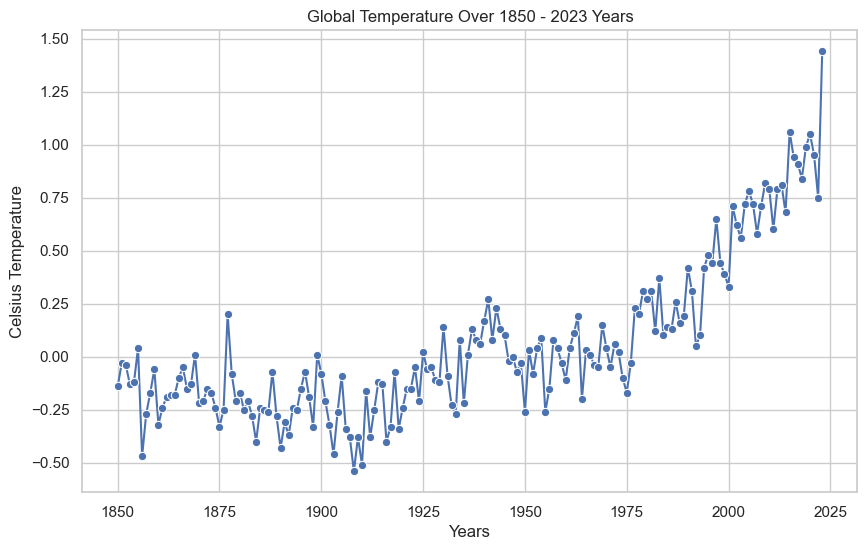

In [17]:
# Specify the path to your Excel file
file_path = './data/Global Time Series_data.csv'

# Base Period: 1850-2003, Degrees Celsius

# Read the specified sheet into a Pandas DataFrame
global_temp = pd.read_csv(file_path, skiprows=4)
print(global_temp.isnull().sum())
print(global_temp.describe())
global_temp.head()
# Plot 'Corrected Years' and 'Celsius temp' 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Anomaly', data=global_temp, marker='o')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Celsius Temperature')
plt.title('Global Temperature Over 1850 - 2023 Years')
plt.grid(True)
plt.show()

### Methane
Methane is a powerful heat-trapping gas. An estimated 60% of today’s methane emissions are the result of human activities.

Methane (CH4) is a powerful greenhouse gas, and is the second-largest contributor to climate warming after carbon dioxide (CO2). A molecule of methane traps more heat than a molecule of CO2, but methane has a relatively short lifespan of 7 to 12 years in the atmosphere, while CO2 can persist for hundreds of years or more.

Methane comes from both natural sources and human activities. An estimated 60% of today’s methane emissions are the result of human activities. The largest sources of methane are agriculture, fossil fuels, and decomposition of landfill waste. Natural processes account for 40% of methane emissions, with wetlands being the largest natural source. (Learn more about the Global Methane Budget.)

The concentration of methane in the atmosphere has more than doubled over the past 200 years. Scientists estimate that this increase is responsible for 20 to 30% of climate warming since the Industrial Revolution (which began in 1750).

Although it’s relatively simple to measure the amount of methane in the atmosphere, it’s harder to pinpoint where it’s coming from. NASA scientists are using several methods to track methane emissions.

In [ ]:
# Global Atmospheric Concentrations of Methane Over Time
# Specify the path to your Excel file
file_path = './data/ghg-concentrations_fig-2.csv'

# Read the specified sheet into a Pandas DataFrame
methane = pd.read_csv(file_path, skiprows=7)
methane.rename(columns={
    'Ice core measurements': 'Year (negative values = BC)',
    'Unnamed: 1': 'EPICA_Dome_C',
    'Unnamed: 2': 'Law_Dome',
    'Unnamed: 3': 'Cape_Grim, Australia',
    'Unnamed: 4': 'Mauna_Loa, Hawaii',
    'Unnamed: 5': 'Shetland Islands, Scotland'
}, inplace=True)
#print(methane.isnull().sum())
#print(methane.describe())
methane

In [ ]:
# Plot 'Corrected Years' and 'Celsius temp' 
fig, ax1 = plt.subplots(figsize=(10, 6))
# Plotting the average data
ax1.plot(methane['Year (negative values = BC)'], methane['EPICA_Dome_C'], 'green', label= "Average") 
ax1.set_xlabel('Years')
ax1.set_ylabel('CH4(ppm)')
plt.title("Atmospheric Methane Levels over the last 800 thousand years")
plt.show()

In [ ]:
# Filter necessary columns
columns_to_plot = ['Year (negative values = BC)', 'EPICA_Dome_C', 'Law_Dome', 'Cape_Grim, Australia', 'Mauna_Loa, Hawaii', 'Shetland Islands, Scotland']
matching_columns = [col for col in methane.columns if any(name in col for name in columns_to_plot)]

methane = methane[matching_columns]

# Convert the 'Year (negative values = BC)' column to numeric
#methane['Year (negative values = BC)'] = pd.to_numeric(methane['Year (negative values = BC)'], errors='coerce')

# Plotting
plt.figure(figsize=(12, 6))
for column in matching_columns[1:]:
    sns.lineplot(x='Year (negative values = BC)', y=column, data=methane, label=column)

# Adding labels and title
plt.xlabel('Year (BC)')
plt.ylabel('Methane Concentration')
plt.title('Global Atmospheric Concentrations of Methane Over Time')
plt.legend()
plt.grid(True)
plt.show()


### Irish Context

Long Term Data Sets
Rainfall time series from 1850-2010 for Ireland.
Homogenisation and analysis of an expanded long-term monthly rainfall network for the Island of Ireland (1850-2010)
1850-2010 for 25 locations has been constructed by researchers at Maynooth University and Met Éireann. 

Composite Rainfall Time Series from 1711-2016 for Ireland.
A continuous 305-year (1711-2016) monthly rainfall series has been created for the Island of Ireland using two key data sources, i) a previously unpublished UK Meteorological Office Note which contains annual rainfall anomalies and corresponding proportional monthly totals based on weather diaries and early observational records for the period 1711-1977 and, ii) a long-term, homogenised monthly rainfall series for the island for the period 1850-2016.

Using estimates of long-term average precipitation sampled from the homogenised series, the new 305-year record is reconstituted and insights drawn about notable extremes, climate variability and change. The consistency of the series was evaluated using long-term observations and reconstructions of precipitation, temperature, circulation indices and the North Atlantic Oscillation. All sources were compiled from across the British-Irish Isles and screened for circularity.



1711 - rainfall over 305 years - reveals statistically significant trends in winter (increasing) and summer (decreasing).
displays year, month, mediam monthly series

Reconstruction of a long-term historical daily maximum and minimum air temperature network dataset for Ireland (1831-1968)

In [ ]:
# Specify the path to your Excel file
file_path = './data/IOI_1711_SERIES.csv'

# Read the specified sheet into a Pandas DataFrame
rainfall_ie = pd.read_csv(file_path)
#print(rainfall_ie.isnull().sum())
print(rainfall_ie)
#print(rainfall_ie.info())
#print(rainfall_ie.describe())

In [ ]:
# Plotting the Median monthly series over time
plt.figure(figsize=(12, 6))
plt.plot(rainfall_ie['Year'] + rainfall_ie['Month'] / 12, rainfall_ie['Median montly series'], label='Median Monthly Series')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Monthly Series')
plt.title('Composite Rainfall Time Series for Ireland (1711-2016)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Yearly Median: Provides information about the central tendency of monthly series for each year.
# aggregate the data by year and calculate the yearly median
yearly_median = rainfall_ie.groupby('Year')['Median montly series'].median().reset_index()

# Plotting the Median monthly series on a yearly basis
plt.figure(figsize=(12, 6))
plt.plot(yearly_median['Year'], yearly_median['Median montly series'], label='Yearly Median Monthly Series', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Monthly Series')
plt.title('Composite Rainfall Time Series for Ireland (1711-2016) - Yearly Median')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Yearly Total: Provides information about the total amount of rainfall for each year - cumulative impact of rainfall for each year

# Aggregate the data by year and calculate the yearly total
yearly_total = rainfall_ie.groupby('Year')['Median montly series'].sum().reset_index()

# Plotting the Yearly Total Monthly Series
plt.figure(figsize=(12, 6))
plt.plot(yearly_total['Year'], yearly_total['Median montly series'], label='Yearly Total Monthly Series', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Monthly Series')
plt.title('Composite Rainfall Time Series for Ireland (1711-2016) - Yearly Total')
plt.legend()
plt.grid(True)
plt.show()

provided calculates and visualizes the moving average for the Yearly Median Monthly Series in the context of your rainfall datase

In [ ]:
# Calculate the average precipitation per year
avg_precipitation_per_year = rainfall_ie.groupby('Year')['Median montly series'].mean().reset_index()

# Calculate a rolling average (e.g., 24 months) for smoothing the trend
avg_precipitation_per_year['Avg_trend'] = avg_precipitation_per_year['Median montly series'].rolling(24, min_periods=1).mean()

# Plotting the average Irish rainfall per year
plt.figure(figsize=(12, 6))
plt.plot(avg_precipitation_per_year['Year'], avg_precipitation_per_year['Median montly series'], label='Average Irish Rainfall', marker='o')
plt.plot(avg_precipitation_per_year['Year'], avg_precipitation_per_year['Avg_trend'], label='Trend (Rolling Average)', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Irish Rainfall per Year with Trend (Adapted from 1711)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate a moving average for the Yearly Median Monthly Series
yearly_median['Moving_Avg'] = yearly_median['Median montly series'].rolling(window=3, center=True).mean()

# Plotting the Yearly Median Monthly Series with Moving Average
plt.figure(figsize=(12, 6))
plt.plot(yearly_median['Year'], yearly_median['Median montly series'], label='Yearly Median Monthly Series', marker='o')
plt.plot(yearly_median['Year'], yearly_median['Moving_Avg'], label='Moving Average', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Monthly Series')
plt.title('Composite Rainfall Time Series for Ireland (1711-2016) - Yearly Median with Moving Average')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Create a mapping of months to seasons
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter',
}

# Add a new column 'Season' based on the mapping
rainfall_ie['Season'] = rainfall_ie['Month'].map(season_mapping)

# Filter data for Summer and Winter
summer_data = rainfall_ie[rainfall_ie['Season'] == 'Summer']
winter_data = rainfall_ie[rainfall_ie['Season'] == 'Winter']

# Calculate average precipitation for Summer and Winter
average_summer_precipitation = summer_data.groupby('Year')['Median montly series'].mean()
average_winter_precipitation = winter_data.groupby('Year')['Median montly series'].mean()

# Plotting the average precipitation for Summer and Winter
plt.figure(figsize=(12, 6))
plt.plot(average_summer_precipitation.index, average_summer_precipitation, label='Average Summer Precipitation', marker='o')
plt.plot(average_winter_precipitation.index, average_winter_precipitation, label='Average Winter Precipitation', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Summer and Winter Precipitation Trends (1711-2016)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Filter data for Summer (months 4, 5, 6, 7, 8, 9) and Winter (months 10, 11, 12, 1, 2, 3)
summer_data = rainfall_ie[rainfall_ie['Month'].isin([4, 5, 6, 7, 8, 9])]
winter_data = rainfall_ie[rainfall_ie['Month'].isin([10, 11, 12, 1, 2, 3])]

# Calculate average precipitation for Summer and Winter
average_summer_precipitation = summer_data.groupby('Year')['Median montly series'].mean()
average_winter_precipitation = winter_data.groupby('Year')['Median montly series'].mean()

# Plotting the average precipitation for Summer and Winter
plt.figure(figsize=(12, 6))
plt.plot(average_summer_precipitation.index, average_summer_precipitation, label='Average Summer Precipitation', marker='o')
plt.plot(average_winter_precipitation.index, average_winter_precipitation, label='Average Winter Precipitation', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Summer and Winter Precipitation Trends (1711-2016)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Specify the folder path
csv_file_path = './export/rf_data.csv'
json_file_path = './export/rf_data.json'

# Export to CSV
rainfall_ie.to_csv(csv_file_path, index=False)
#print(f'Data exported to CSV: {csv_file_path}')

# Export to JSON
rainfall_ie.to_json(json_file_path, orient='records')
#print(f'Data exported to JSON: {json_file_path}')

### An analysis of irish Context

### References

https://www.dias.ie/wp-content/uploads/2016/07/Session2_VRath_Iretherm2016.pdf

https://www.epa.ie/publications/research/climate-change/Reserach_Report_277.pdf

https://www.universityofgalway.ie/pru/
https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr1031.pdf

https://www.rapidtables.com/convert/temperature/kelvin-to-celsius.html

https://www.ncei.noaa.gov/products/paleoclimatology/paleo-perspectives/global-warming

https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide#:~:text=Based%20on%20air%20bubbles%20trapped,was%20280%20ppm%20or%20less.

https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide

https://council.science/current/blog/climate-explained-why-is-the-arctic-warming-faster-than-other-parts-of-the-world/

https://education.nationalgeographic.org/resource/paleoclimatology-RL/

https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter05_FINAL.pdf

https://www.ncei.noaa.gov/access/paleo-search/study/6080

https://www.met.ie/climate/available-data/long-term-data-sets/

https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13

https://edition.cnn.com/2023/11/20/climate/2-degree-warming-limit-record-copernicus-climate-int/index.html